Distribución de clases en la base de datos:
Activity
Antibacterial    1582
Otros             417
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
0    317
1     83
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Reporte de Clasificación:
               precision    recall  f1-score   support

Antibacterial       0.79      1.00      0.88       317
        Otros       0.00      0.00      0.00        83

     accuracy                           0.79       400
    macro avg       0.40      0.50      0.44       400
 weighted avg       0.63      0.79      0.70       400



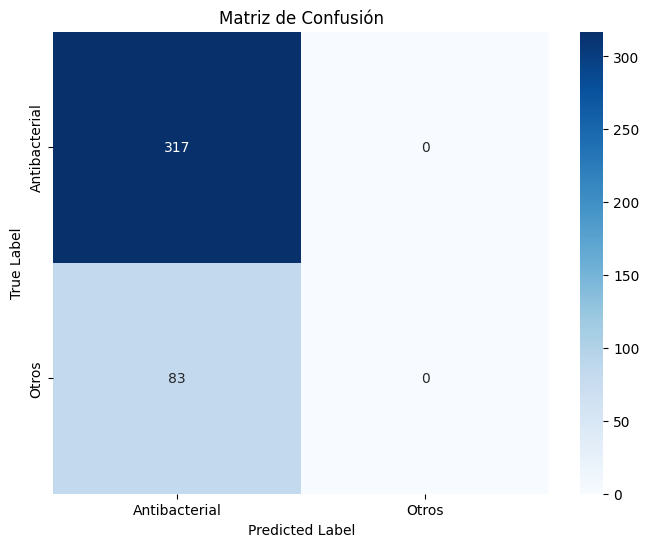

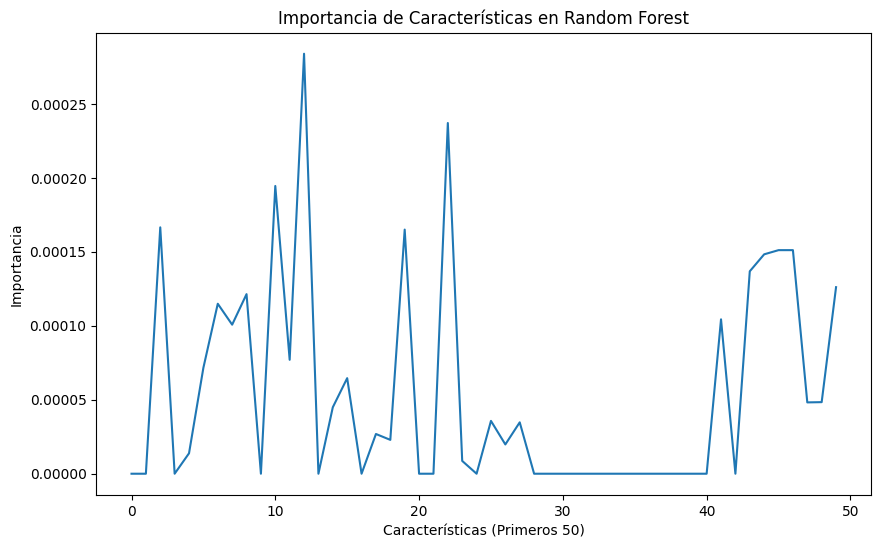

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar la base de datos
file_path = "nueva_base_+300_final.csv"  # Ajusta el nombre si es diferente
df = pd.read_csv(file_path)

# Renombrar la columna si tiene error tipográfico
if "Seqence" in df.columns:
    df.rename(columns={"Seqence": "Sequence"}, inplace=True)

# Ver distribución de clases antes de dividir los datos
print("Distribución de clases en la base de datos:")
print(df["Activity"].value_counts())

# Extraer secuencias y actividades
sequences = df["Sequence"].tolist()
activities = df["Activity"].tolist()

# Crear una lista de todos los aminoácidos únicos
unique_amino_acids = sorted(set("".join(sequences)))

# Inicializar el codificador One-Hot
encoder = OneHotEncoder(categories=[unique_amino_acids], sparse_output=False)


# Codificar cada secuencia en One-Hot
X_encoded = []
for seq in sequences:
    one_hot_seq = encoder.fit_transform([[aa] for aa in seq])
    X_encoded.append(one_hot_seq.flatten())

# Convertir a DataFrame
X_encoded = pd.DataFrame(X_encoded)

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(activities)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Ver distribución de clases después de la división
print("\nDistribución de clases en el conjunto de prueba:")
print(pd.Series(y_test).value_counts())

# Entrenar el modelo Random Forest con hiperparámetros ajustados
clf = RandomForestClassifier(
    n_estimators=200,        # Más árboles para estabilidad
    max_depth=15,            # Limitar la profundidad para evitar sobreajuste
    class_weight="balanced", # Ajuste de pesos para clases desbalanceadas
    min_samples_split=5,     # Evitar ramas muy pequeñas
    random_state=42
)

clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nReporte de Clasificación:")
print(report)

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión")
plt.show()

# Importancia de características
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
plt.plot(importances[:50])  # Mostramos las primeras 50 características por claridad
plt.xlabel("Características (Primeros 50)")
plt.ylabel("Importancia")
plt.title("Importancia de Características en Random Forest")
plt.show()
